In [17]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
import pickle
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from lesson_functions import *
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
from scipy.ndimage.measurements import label
% matplotlib inline


extract_features_flag = 0
split_data_flag = 0
train_model_flag = 1


## Load Filenames

In [12]:
if extract_features_flag == 1:
    cars = []
    notcars = []
    notcars = glob.iglob('data/non-vehicles/**/*.png', recursive=True)

    cars = glob.iglob('data/vehicles/**/*.png', recursive=True)

In [13]:
if extract_features_flag == 1:
    ## Parameters
    color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
    orient = 9  # HOG orientations
    pix_per_cell = 8 # HOG pixels per cell
    cell_per_block = 2 # HOG cells per block
    hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
    spatial_size = (32, 32) # Spatial binning dimensions
    hist_bins = 32    # Number of histogram bins
    spatial_feat = True # Spatial features on or off
    hist_feat = True # Histogram features on or off
    hog_feat = True # HOG features on or off
    y_start_stop = [500, 650] # Min and max in y to search in slide_window()

    car_features = extract_features(cars, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)

    notcar_features = extract_features(notcars, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)

    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)

    # Save the scalers!!
    pickle.dump(X_scaler, open('X_scaler.p','wb'))
    # Save features
    pickle.dump(scaled_X, open('scaled_X.p','wb'))

    # Define the labels vector
    y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))
    
    # Save features
    pickle.dump(y, open('y.p','wb'))


/Users/andrew/miniconda2/envs/keras2/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [14]:
# Opposite of above
if extract_features_flag == 0:
    X_scaler = pickle.load(open('X_scaler.p','rb'))
    scaled_X = pickle.load(open('scaled_X.p','rb'))
    y = pickle.load(open('y.p','rb'))


## Split into train and test


In [15]:
if split_data_flag ==1:
    # Split up data into randomized training and test sets
    rand_state = 5757 #np.random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, 
                                                        test_size=0.2, 
                                                        random_state=rand_state, 
                                                        shuffle=True)

    # Save train and test data
    trainTest = [X_train, X_test, y_train, y_test ]
    pickle.dump(trainTest, open('train_test_splits.p','wb'))
    
    print('Using:',orient,'orientations',pix_per_cell,
        'pixels per cell and', cell_per_block,'cells per block')
    print('Feature vector length:', len(X_train[0]))

Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 8460


## Train a Model

In [6]:
################################################################
## TRAIN A MODEL
################################################################
if train_model_flag == 1:
    # Use a linear SVC 
    svc = LinearSVC()
    # Check the training time for the SVC
    t=time.time()
    svc.fit(X_train, y_train)
    t2 = time.time()
    print(round(t2-t, 2), 'Seconds to train SVC...')
    # Check the score of the SVC
    print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
    # Check the prediction time for a single sample
    t=time.time()

    pickle.dump(svc, open('svc_model.p','wb'))

0.21 Seconds to train SVC...
Test Accuracy of SVC =  1.0


## Search and Predict on New Image

test_features len (8460,)
test_features sum 62.7115036299
test_features len (8460,)
test_features sum -151.27171413
test_features len (8460,)
test_features sum -432.730416063
test_features len (8460,)
test_features sum -397.991432198
test_features len (8460,)
test_features sum -13.5004198775
test_features len (8460,)
test_features sum 225.673977577
test_features len (8460,)
test_features sum 216.887296304
test_features len (8460,)
test_features sum -73.8879088536
test_features len (8460,)
test_features sum -489.305634207
test_features len (8460,)
test_features sum -458.349401657
test_features len (8460,)
test_features sum -595.7535349
test_features len (8460,)
test_features sum -151.276010553
test_features len (8460,)
test_features sum -12.2554434373
test_features len (8460,)
test_features sum 262.725953036


/Users/andrew/miniconda2/envs/keras/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


test_features len (8460,)
test_features sum 893.949211673
test_features len (8460,)
test_features sum 965.857624643
test_features len (8460,)
test_features sum 1044.80069019
test_features len (8460,)
test_features sum 591.708727015
test_features len (8460,)
test_features sum -498.372239079
test_features len (8460,)
test_features sum -787.729304039
test_features len (8460,)
test_features sum -546.857986145
test_features len (8460,)
test_features sum -246.177406537
test_features len (8460,)
test_features sum 66.5420644663
test_features len (8460,)
test_features sum 121.570405574
test_features len (8460,)
test_features sum -403.614368569
test_features len (8460,)
test_features sum -563.168572298
test_features len (8460,)
test_features sum -702.15767206
test_features len (8460,)
test_features sum -790.506685743
test_features len (8460,)
test_features sum -890.07344027
test_features len (8460,)
test_features sum -784.120894482
test_features len (8460,)
test_features sum -470.750028449
test_

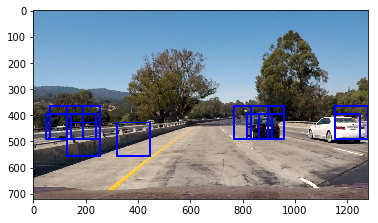

In [7]:
# load model
svc = pickle.load(open('svc_model.p','rb'))

# Load Image
image = mpimg.imread('test_image.jpg')
draw_image = np.copy(image)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
image = image.astype(np.float32)/255

y_start_stop = [300, 650]

window_size_list = [(96, 96), (128, 128)]
windows = []

for ws in window_size_list:
    # Slide window
    wd = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                        xy_window=ws, xy_overlap=(0.5, 0.5))
    # Concatenate window list
    windows = windows + wd

hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)   
                   
window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

plt.imshow(window_img)
plt.show()

## Filter out false positives and duplicates

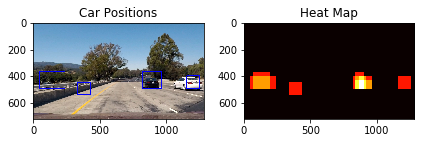

In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
from scipy.ndimage.measurements import label

# Read in a pickle file with bboxes saved
# Each item in the "all_bboxes" list will contain a 
# list of boxes for one of the images shown above
# box_list = pickle.load( open( "bbox_pickle.p", "rb" ))
box_list = hot_windows

# Read in image similar to one shown above 
image = mpimg.imread('test_image.jpg')
heat = np.zeros_like(image[:,:,0]).astype(np.float)


# Add heat to each box in box list
heat = add_heat(heat,box_list)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,1)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(image), labels)

fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()
plt.show()

## One Function Detection for video (combines above funcs)

/Users/andrew/miniconda2/envs/keras/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


test_features len (8460,)
test_features sum 62.7115036299
test_features len (8460,)
test_features sum -151.27171413
test_features len (8460,)
test_features sum -432.730416063
test_features len (8460,)
test_features sum -397.991432198
test_features len (8460,)
test_features sum -13.5004198775
test_features len (8460,)
test_features sum 225.673977577
test_features len (8460,)
test_features sum 216.887296304
test_features len (8460,)
test_features sum -73.8879088536
test_features len (8460,)
test_features sum -489.305634207
test_features len (8460,)
test_features sum -458.349401657
test_features len (8460,)
test_features sum -595.7535349
test_features len (8460,)
test_features sum -151.276010553
test_features len (8460,)
test_features sum -12.2554434373
test_features len (8460,)
test_features sum 262.725953036
test_features len (8460,)
test_features sum 893.949211673
test_features len (8460,)
test_features sum 965.857624643
test_features len (8460,)
test_features sum 1044.80069019
test_fe

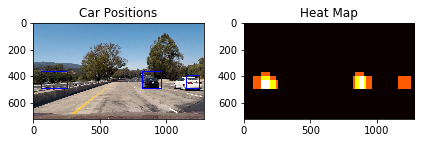

In [13]:
def pipeline(image):
    # Uncomment if training in on png and classification on jpg
    image = image.astype(np.float32)/255
    #draw_image = np.copy(image)  
    y_start_stop = [300, 650]

    window_size_list = [(96, 96), (128, 128)]
    windows = []

    for ws in window_size_list:
        # Slide window
        wd = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                            xy_window=ws, xy_overlap=(0.5, 0.5))
        # Concatenate window list
        windows = windows + wd

    hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)   

    #window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    
    
    # Create empty heat map
    heat = np.zeros_like(image[:,:,0]).astype(np.float)


    # Add heat to each box in box list
    heat = add_heat(heat,hot_windows)

    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,1)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)

    return draw_img  , heatmap


## RUN PIPELINE
# Params
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [500, 650] # Min and max in y to search in slide_window()

# Load Image
image = mpimg.imread('test_image.jpg')  
draw_img, heatmap = pipeline(image)

fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()
plt.show()

In [11]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

# load model
svc = pickle.load(open('svc_model.p','rb'))

output = 'project_video_output.mp4'
## UNCOMMENT
# # A short subclip
# clip1 = VideoFileClip("project_video.mp4").subclip(10,13)
# # clip1 = VideoFileClip("project_video.mp4")
# white_clip = clip1.fl_image(pipeline) #NOTE: this function expects color images!!
# %time white_clip.write_videofile(output, audio=False)

# Faster! New Hog Subsample Method

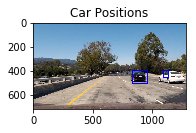

In [18]:
# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    global car
    draw_img = np.copy(img)
    
    # process every second frame
    if car.getCounterMod(4) == 0:
    
        ## UNCOMMENT FOR PNG 
        img = img.astype(np.float32)/255

        img_tosearch = img[ystart:ystop,:,:]
        ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
        if scale != 1:
            imshape = ctrans_tosearch.shape
            ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))

        ch1 = ctrans_tosearch[:,:,0]
        ch2 = ctrans_tosearch[:,:,1]
        ch3 = ctrans_tosearch[:,:,2]

        # Define blocks and steps as above
        nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
        nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
        nfeat_per_block = orient*cell_per_block**2

        # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
        window = 64
        nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
        cells_per_step = 2  # Instead of overlap, define how many cells to step
        nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
        nysteps = (nyblocks - nblocks_per_window) // cells_per_step

        # Compute individual channel HOG features for the entire image
        hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
        hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
        hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)

        hot_windows = []

        # Iterate through Image Sub Windows
        for xb in range(nxsteps):
            for yb in range(nysteps):
                ypos = yb*cells_per_step
                xpos = xb*cells_per_step
                # Extract HOG for this patch
                hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

                xleft = xpos*pix_per_cell
                ytop = ypos*pix_per_cell

                # Extract the image patch
                subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (window,window))

                # Get color features
                spatial_features = bin_spatial(subimg, size=spatial_size)
                hist_features = color_hist(subimg, nbins=hist_bins)

                # Scale features and make a prediction
                test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    

                #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
                test_prediction = svc.predict(test_features)

                if test_prediction == 1:
                    xbox_left = np.int(xleft*scale)
                    ytop_draw = np.int(ytop*scale)
                    win_draw = np.int(window*scale)
                    # Draw Hot windows on Image (there will be dups and false positives)
                    # cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                    # Append the hot windows
                    hot_windows.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))

        ##############################
        ## Deal with Dups
        ##############################
        # Create empty heat map
        heat = np.zeros_like(draw_img[:,:,0]).astype(np.float)

        # Add heat to each box in box list
        heat = add_heat(heat,hot_windows)

        # Apply threshold to help remove false positives
        heat = apply_threshold(heat,1)

        # Visualize the heatmap when displaying    
        heatmap = np.clip(heat, 0, 255)
        
        ## Do some smoothing if not on first frame
        if car.cnt > 0:
            smoothing = 0.7
            heatmap = (heatmap*smoothing + car.getHeatmap()*(1-smoothing) ) / 2
            
        # Find final boxes from heatmap using label function
        labels = label(heatmap)

        # Save the labels for next time
        car.setLabels(labels)
        car.setHeatmap(heatmap)

    else:
        # We will use the boxes from the last frame
        labels = car.getLabels()
        # We will use the heatmap from the last frame
        heatmap = car.getHeatmap()
        
    # draw the boxes
    draw_img = draw_labeled_bboxes(np.copy(img), labels)

    # update frame counter
    car.updateCounter()
    
    return draw_img, heatmap

def fastPipeline(img):
    
    ystart = 300
    ystop = 650
    scale = 1.5

    orient = 9  # HOG orientations
    pix_per_cell = 8 # HOG pixels per cell
    cell_per_block = 2 # HOG cells per block
    spatial_size = (32, 32) # Spatial binning dimensions
    hist_bins = 32    # Number of histogram bins
    scale = 1

    # HEATMAP
    out_img, heatmap = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

    return out_img


########################################
## RUN FAST PIPELINE
########################################
# load model
svc = pickle.load(open('svc_model.p','rb'))
X_scaler = pickle.load(open('X_scaler.p','rb'))
car = carDetector()

# Read Image
img = mpimg.imread('test_image.jpg')

draw_img = fastPipeline(img)
# draw_img, heatmap = fastPipeline(img)

fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
# plt.subplot(122)
# plt.imshow(heatmap, cmap='hot')
# plt.title('Heat Map')
# fig.tight_layout()
plt.show()

In [19]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

# load model
svc = pickle.load(open('svc_model.p','rb'))
X_scaler = pickle.load(open('X_scaler.p','rb'))
car = carDetector()

output = 'project_video_output.mp4'
## UNCOMMENT
# A short subclip
clip1 = VideoFileClip("project_video.mp4").subclip(10,12)
# clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(fastPipeline) #NOTE: this function expects color images!!
%time white_clip.write_videofile(output, audio=False)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4








  0%|          | 0/51 [00:00<?, ?it/s]





  8%|▊         | 4/51 [00:01<00:23,  2.03it/s]





 14%|█▎        | 7/51 [00:02<00:15,  2.81it/s]





 16%|█▌        | 8/51 [00:03<00:35,  1.22it/s]





 24%|██▎       | 12/51 [00:06<00:28,  1.37it/s]





 29%|██▉       | 15/51 [00:06<00:18,  1.91it/s]





 33%|███▎      | 17/51 [00:08<00:23,  1.46it/s]





 39%|███▉      | 20/51 [00:10<00:21,  1.41it/s]





 45%|████▌     | 23/51 [00:10<00:14,  1.97it/s]





 49%|████▉     | 25/51 [00:12<00:17,  1.53it/s]





 55%|█████▍    | 28/51 [00:14<00:15,  1.49it/s]





 63%|██████▎   | 32/51 [00:17<00:12,  1.57it/s]





 71%|███████   | 36/51 [00:19<00:09,  1.56it/s]





 78%|███████▊  | 40/51 [00:22<00:06,  1.59it/s]





 86%|████████▋ | 44/51 [00:24<00:04,  1.65it/s]





 94%|█████████▍| 48/51 [00:26<00:01,  1.71it/s]





 98%|█████████▊| 50/51 [00:26<00:00,  1.89it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 25.6 s, sys: 1.02 s, total: 26.6 s
Wall time: 27.5 s


## Need to make extract features do the same thing as find_cars!!

- convert to RGB2YCrCb  
- breaks into 3 channels  
- gets hog features for all 3 channels  
- gets spatial_features
- gets hist_features


- trained feature is 8460 in length
- both have same vector length
- subsampling model creates 6 times as many features for the same image
- The issue was the div by 255 when scaling between png and jpg 


